Your project is about automating sales data cleaning, processing, and reporting using Python & Pandas.

✅ Clean and standardize raw sales data (fix missing values, duplicates, incorrect formats).

✅ Merge multiple datasets (sales pipeline, accounts, sales teams) to create a unified view.

✅ Generate an automated sales report with key insights (revenue, conversion rates, top-performing reps).

✅ (Optional) Automate the process so the report runs on a schedule.

Merge Data for Deeper Insights

✅ Pipeline + Accounts
- Do larger companies (high revenue/employees) close more deals?
- Which industries perform best?
- Action: Compare win rates by company size & industry.

✅ Pipeline + Sales Team
- Which sales agents or regions have the highest close rates?
- Do some managers perform better than others?
- Action: Create a leaderboard table for sales reps.

✅ Pipeline + Products
- Which products have the highest win rates?
- Do some products stall in the pipeline more than others?
- Action: Compare deal win rates by product.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [9]:
# Define file paths
data_path = '/Users/sayo/personal_projects/sales-ops-auto/data'

In [10]:
# Load datasets
accounts_df = pd.read_csv(os.path.join(data_path, "accounts.csv"))
metadata_df = pd.read_csv(os.path.join(data_path, "metadata.csv"))
products_df = pd.read_csv(os.path.join(data_path, "products.csv"))
sales_pipeline_df = pd.read_csv(os.path.join(data_path, "sales_pipeline.csv"))
sales_teams_df = pd.read_csv(os.path.join(data_path, "sales_teams.csv"))


In [11]:
# Show basic info about each dataset
datasets = {
    "Accounts": accounts_df,
    "Metadata": metadata_df,
    "Products": products_df,
    "Sales Pipeline": sales_pipeline_df,
    "Sales Teams": sales_teams_df,
}

for name, df in datasets.items():
    print(f"📊 {name} Dataset:")
    print(df.info(), "\n")

📊 Accounts Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   account           85 non-null     object 
 1   sector            85 non-null     object 
 2   year_established  85 non-null     int64  
 3   revenue           85 non-null     float64
 4   employees         85 non-null     int64  
 5   office_location   85 non-null     object 
 6   subsidiary_of     15 non-null     object 
dtypes: float64(1), int64(2), object(4)
memory usage: 4.8+ KB
None 

📊 Metadata Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Table        21 non-null     object
 1   Field        21 non-null     object
 2   Description  21 non-null     object
dtypes: object(3)
memory usage: 636.0+ bytes
None 

📊 Produ

Accounts EDA

In [12]:
accounts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   account           85 non-null     object 
 1   sector            85 non-null     object 
 2   year_established  85 non-null     int64  
 3   revenue           85 non-null     float64
 4   employees         85 non-null     int64  
 5   office_location   85 non-null     object 
 6   subsidiary_of     15 non-null     object 
dtypes: float64(1), int64(2), object(4)
memory usage: 4.8+ KB


In [13]:
accounts_df.head(20)

,account,sector,year_established,revenue,employees,office_location,subsidiary_of
0,Acme Corporation,technolgy,1996,1100.04,2822,United States,NaN
1,Betasoloin,medical,1999,251.41,495,United States,NaN
2,Betatech,medical,1986,647.18,1185,Kenya,NaN
3,Bioholding,medical,2012,587.34,1356,Philipines,NaN
4,Bioplex,medical,1991,326.82,1016,United States,NaN
5,Blackzim,retail,2009,497.11,1588,United States,NaN
6,Bluth Company,technolgy,1993,1242.32,3027,United States,Acme Corporation
7,Bubba Gump,software,2002,987.39,2253,United States,NaN
8,Cancity,retail,2001,718.62,2448,United States,NaN
9,Cheers,entertainment,1993,4269.90,6472,United States,Massive Dynamic


In [14]:
accounts_df.describe()

,year_established,revenue,employees
count,85.000000,85.000000,85.000000
mean,1996.105882,1994.632941,4660.823529
std,8.865427,2169.491436,5715.601198
min,1979.000000,4.540000,9.000000
25%,1989.000000,497.110000,1179.000000
50%,1996.000000,1223.720000,2769.000000
75%,2002.000000,2741.370000,5595.000000
max,2017.000000,11698.030000,34288.000000


In [15]:
# Check for missing values
accounts_df.isnull().sum()

account              0
sector               0
year_established     0
revenue              0
employees            0
office_location      0
subsidiary_of       70
dtype: int64

In [16]:
accounts_df.tail(20)

,account,sector,year_established,revenue,employees,office_location,subsidiary_of
65,Stanredtax,finance,1987,1698.20,3798,United States,NaN
66,Statholdings,employment,1997,291.27,586,United States,NaN
67,Streethex,retail,1988,1376.80,1165,Belgium,NaN
68,Sumace,retail,2000,167.89,493,Romania,NaN
69,Sunnamplex,marketing,2008,894.37,1593,Poland,NaN
70,The New York Inquirer,medical,1996,439.21,792,United States,NaN
71,Toughzap,retail,1995,332.43,799,United States,NaN
72,Treequote,telecommunications,1988,5266.09,8595,United States,Sonron
73,Umbrella Corporation,finance,1998,2022.14,5113,United States,NaN
74,Vehement Capital Partners,finance,1993,646.10,883,United States,Golddex


In [17]:
# Check for duplicates
accounts_df.nunique()

account             85
sector              10
year_established    35
revenue             85
employees           85
office_location     15
subsidiary_of        7
dtype: int64

In [18]:
# Check for % of duplicates in each coloumn
(accounts_df.isnull().sum()/len(accounts_df))*100

account              0.000000
sector               0.000000
year_established     0.000000
revenue              0.000000
employees            0.000000
office_location      0.000000
subsidiary_of       82.352941
dtype: float64

In [19]:
accounts_df = accounts_df.drop(['subsidiary_of'], axis=1)
accounts_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   account           85 non-null     object 
 1   sector            85 non-null     object 
 2   year_established  85 non-null     int64  
 3   revenue           85 non-null     float64
 4   employees         85 non-null     int64  
 5   office_location   85 non-null     object 
dtypes: float64(1), int64(2), object(3)
memory usage: 4.1+ KB


Sales Pipeline EDA

In [20]:
sales_pipeline_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8800 entries, 0 to 8799
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   opportunity_id  8800 non-null   object 
 1   sales_agent     8800 non-null   object 
 2   product         8800 non-null   object 
 3   account         7375 non-null   object 
 4   deal_stage      8800 non-null   object 
 5   engage_date     8300 non-null   object 
 6   close_date      6711 non-null   object 
 7   close_value     6711 non-null   float64
dtypes: float64(1), object(7)
memory usage: 550.1+ KB


In [21]:
sales_pipeline_df.head(20)

,opportunity_id,sales_agent,product,account,deal_stage,engage_date,close_date,close_value
0,1C1I7A6R,Moses Frase,GTX Plus Basic,Cancity,Won,2016-10-20,2017-03-01,1054.0
1,Z063OYW0,Darcel Schlecht,GTXPro,Isdom,Won,2016-10-25,2017-03-11,4514.0
2,EC4QE1BX,Darcel Schlecht,MG Special,Cancity,Won,2016-10-25,2017-03-07,50.0
3,MV1LWRNH,Moses Frase,GTX Basic,Codehow,Won,2016-10-25,2017-03-09,588.0
4,PE84CX4O,Zane Levy,GTX Basic,Hatfan,Won,2016-10-25,2017-03-02,517.0
5,ZNBS69V1,Anna Snelling,MG Special,Ron-tech,Won,2016-10-29,2017-03-01,49.0
6,9ME3374G,Vicki Laflamme,MG Special,J-Texon,Won,2016-10-30,2017-03-02,57.0
7,7GN8Q4LL,Markita Hansen,GTX Basic,Cheers,Won,2016-11-01,2017-03-07,601.0
8,OLK9LKZB,Niesha Huffines,GTX Plus Basic,Zumgoity,Won,2016-11-01,2017-03-03,1026.0
9,HAXMC4IX,James Ascencio,MG Advanced,NaN,Engaging,2016-11-03,NaN,NaN


In [22]:
sales_pipeline_df.describe()

,close_value
count,6711.000000
mean,1490.915512
std,2320.670773
min,0.000000
25%,0.000000
50%,472.000000
75%,3225.000000
max,30288.000000


In [23]:
sales_pipeline_df.nunique()

opportunity_id    8800
sales_agent         30
product              7
account             85
deal_stage           4
engage_date        421
close_date         306
close_value       2051
dtype: int64

In [24]:
sales_pipeline_df.isnull().sum()

opportunity_id       0
sales_agent          0
product              0
account           1425
deal_stage           0
engage_date        500
close_date        2089
close_value       2089
dtype: int64

In [25]:
(sales_pipeline_df.isnull().sum()/len(sales_pipeline_df))*100

opportunity_id     0.000000
sales_agent        0.000000
product            0.000000
account           16.193182
deal_stage         0.000000
engage_date        5.681818
close_date        23.738636
close_value       23.738636
dtype: float64

In [26]:
sales_pipeline_df.describe()

,close_value
count,6711.000000
mean,1490.915512
std,2320.670773
min,0.000000
25%,0.000000
50%,472.000000
75%,3225.000000
max,30288.000000


In [27]:
sales_pipeline_df.account.value_counts()

account
Hottechi                 200
Kan-code                 196
Konex                    178
Condax                   170
Dontechi                 129
                        ... 
Newex                     55
Bioplex                   53
The New York Inquirer     52
Sumace                    52
Iselectrics               51
Name: count, Length: 85, dtype: int64

In [28]:
sales_pipeline_df.account.value_counts().nunique()

55

In [29]:
sales_pipeline_df.account.value_counts().head(55)

account
Hottechi                        200
Kan-code                        196
Konex                           178
Condax                          170
Dontechi                        129
Codehow                         121
Isdom                           119
Treequote                       116
Inity                           113
Ron-tech                        112
Singletechno                    112
Funholding                      109
Rangreen                        109
Streethex                       109
Stanredtax                      106
Warephase                       106
Scotfind                        105
Rundofase                       104
Plussunin                       103
Finhigh                         102
Cancity                         101
Cheers                           98
Conecom                          97
Goodsilron                       95
Xx-zobam                         94
Genco Pura Olive Oil Company     94
Bioholding                       94
Betatech            

In [30]:
most_common_account = sales_pipeline_df['account'].value_counts().idxmax()
print(f"The account with the most entries is: {most_common_account}")

The account with the most entries is: Hottechi


In [31]:
sum_amount_by_account = sales_pipeline_df.groupby('account')['close_value'].sum()
print(f"sum amount by account: {sum_amount_by_account}")

sum amount by account: account
Acme Corporation    101744.0
Betasoloin           97036.0
Betatech            107408.0
Bioholding           90991.0
Bioplex              67393.0
                      ...   
Zencorporation       86690.0
Zoomit               76684.0
Zotware             138339.0
Zumgoity             78237.0
dambase             116394.0
Name: close_value, Length: 85, dtype: float64


In [32]:
sum_close_value_hottechi = sales_pipeline_df[sales_pipeline_df['account'] == 'Hottechi']['close_value'].sum()
print(f"The sum of close value for Hottechi is: {sum_close_value_hottechi}")

The sum of close value for Hottechi is: 194957.0


In [33]:
top_ten_companies = sum_amount_by_account.sort_values(ascending=False).head()
print(top_ten_companies)

account
Kan-code    341455.0
Konex       269245.0
Condax      206410.0
Cheers      198020.0
Hottechi    194957.0
Name: close_value, dtype: float64


In [34]:
least_ten_companies = sum_amount_by_account.sort_values(ascending=True).head()
print(least_ten_companies)

account
Golddex          51632.0
Zathunicon       55616.0
Donware          56637.0
Bluth Company    56903.0
Sumace           59905.0
Name: close_value, dtype: float64


In [35]:
# Filter for won deals
won_deals_df = sales_pipeline_df[sales_pipeline_df['deal_stage'] == 'Won']

# Group by account and count the number of won deals
won_deals_count = won_deals_df.groupby('account').size()

# Find the company with the most won deals
company_most_won_deals = won_deals_count.idxmax()
most_won_deals_count = won_deals_count.max()

print(f"The company with the most won deals is: {company_most_won_deals} with {most_won_deals_count} won deals.")

The company with the most won deals is: Kan-code with 115 won deals.


In [36]:
sum_won_deals_kan_code = won_deals_df[won_deals_df['account'] == 'Kan-code']['close_value'].sum()
print(f"The sum of all won deals by Kan-code is: {sum_won_deals_kan_code}")

The sum of all won deals by Kan-code is: 341455.0


so far the analysis it that the compnay with most won deals is Kan Code but the one with most entries is hottechi

In [37]:
lost_deals_df = sales_pipeline_df[sales_pipeline_df['deal_stage'] == 'Lost']

lost_deals_count = lost_deals_df.groupby('account').size()

company_most_lost_deals = lost_deals_count.idxmax()

print(f"The company with the most lost deals is: {company_most_lost_deals}")

The company with the most lost deals is: Hottechi


In [38]:
lost_deals_df.head()

,opportunity_id,sales_agent,product,account,deal_stage,engage_date,close_date,close_value
11,KWVA7VR1,Gladys Colclough,GTXPro,Genco Pura Olive Oil Company,Lost,2016-11-04,2017-03-18,0.0
15,3F5MZNEH,Rosalina Dieter,MG Special,Sonron,Lost,2016-11-05,2017-03-03,0.0
18,902REDPA,Daniell Hammack,GTXPro,Xx-zobam,Lost,2016-11-07,2017-03-09,0.0
20,JJXRR8R6,James Ascencio,GTX Plus Pro,Fasehatice,Lost,2016-11-07,2017-03-17,0.0
27,AO9Z2D17,Violet Mclelland,GTX Plus Pro,Xx-zobam,Lost,2016-11-10,2017-03-11,0.0


In [39]:
sales_pipeline_df.head()

,opportunity_id,sales_agent,product,account,deal_stage,engage_date,close_date,close_value
0,1C1I7A6R,Moses Frase,GTX Plus Basic,Cancity,Won,2016-10-20,2017-03-01,1054.0
1,Z063OYW0,Darcel Schlecht,GTXPro,Isdom,Won,2016-10-25,2017-03-11,4514.0
2,EC4QE1BX,Darcel Schlecht,MG Special,Cancity,Won,2016-10-25,2017-03-07,50.0
3,MV1LWRNH,Moses Frase,GTX Basic,Codehow,Won,2016-10-25,2017-03-09,588.0
4,PE84CX4O,Zane Levy,GTX Basic,Hatfan,Won,2016-10-25,2017-03-02,517.0


In [40]:
sales_pipeline_df['deal_stage'].value_counts()

deal_stage
Won            4238
Lost           2473
Engaging       1589
Prospecting     500
Name: count, dtype: int64

In [41]:
deal_stage_percentage = sales_pipeline_df['deal_stage'].value_counts(normalize=True) * 100
print(deal_stage_percentage)

deal_stage
Won            48.159091
Lost           28.102273
Engaging       18.056818
Prospecting     5.681818
Name: proportion, dtype: float64


A healthy sales pipeline typically follows a balanced distribution of deals across different stages. While the ideal percentages can vary by industry, sales cycle length, and business model, a general benchmark is:

	•	Prospecting (Top of Funnel): ~40-50%
	•	Engaging (Middle of Funnel): ~25-30%
	•	Proposal/Negotiation (Late Stage): ~15-20%
	•	Won Deals: ~10-20%
	•	Lost Deals: ~10-20% (shouldn’t be too high, or it signals qualification issues)

<Axes: xlabel='deal_stage'>

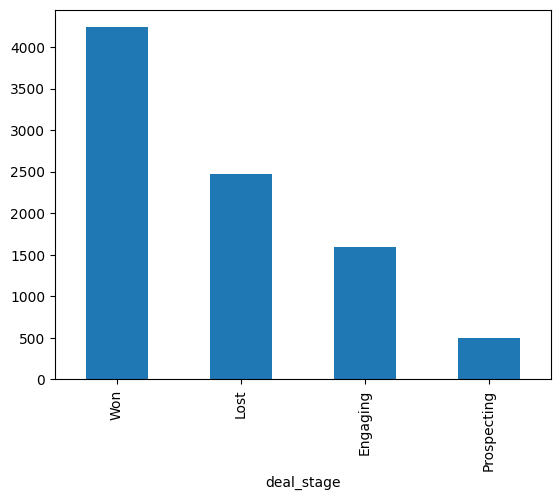

In [42]:
sales_pipeline_df['deal_stage'].value_counts().plot(kind='bar')

In [43]:
lost_deals_count_per_company_sorted = lost_deals_count.sort_values(ascending=False)
print(lost_deals_count_per_company_sorted)

account
Hottechi          82
Kan-code          72
Konex             63
Condax            54
Dontechi          47
                  ..
Zencorporation    15
Newex             14
Iselectrics       13
Zoomit            13
Plusstrip         13
Length: 85, dtype: int64


In [44]:
won_deals_count_per_company_sorted = won_deals_count.sort_values(ascending=False)
print(won_deals_count_per_company_sorted)

account
Kan-code                 115
Hottechi                 111
Konex                    108
Condax                   105
Rangreen                  75
                        ... 
Opentech                  30
The New York Inquirer     28
Bluth Company             28
Iselectrics               25
Sumace                    23
Length: 85, dtype: int64


In [45]:
sales_pipeline_df.head()

,opportunity_id,sales_agent,product,account,deal_stage,engage_date,close_date,close_value
0,1C1I7A6R,Moses Frase,GTX Plus Basic,Cancity,Won,2016-10-20,2017-03-01,1054.0
1,Z063OYW0,Darcel Schlecht,GTXPro,Isdom,Won,2016-10-25,2017-03-11,4514.0
2,EC4QE1BX,Darcel Schlecht,MG Special,Cancity,Won,2016-10-25,2017-03-07,50.0
3,MV1LWRNH,Moses Frase,GTX Basic,Codehow,Won,2016-10-25,2017-03-09,588.0
4,PE84CX4O,Zane Levy,GTX Basic,Hatfan,Won,2016-10-25,2017-03-02,517.0


Initial analysis 
- company with most lost deals : hottechi, kan code, konex, condax
- company with most won deals : kan code, hottechi, konex, condax
- deal sales cycle need more granuality: we need sub stages in order for a better forecast
- Top funnel prospecting is too low (it needs to be 50% of the overall pipeline)
- won deals looks very high but not sustainable over time if other stages are not being balanced properly

Sales Pipeline Deep Dive (Key Analysis)

✅ Deal Distribution by Stage
- What % of deals are in Prospecting, Engaging, Proposal, Won, and Lost?
- Does Prospecting make up ~50% of the pipeline?
- Action: Generate a funnel chart or bar chart for visualization.

✅ Win/Loss Breakdown
- Which companies contribute the most won and lost deals?
- What are the top reasons for lost deals?
- Action: Create a win/loss ratio table by company.

✅ Conversion Rates Per Stage
- What % of deals move forward vs. drop off at each stage?
- Are some stages blocking progress?
- Action: Create a conversion rate table or heatmap.

✅ Sales Cycle Analysis
- What is the average time per stage?
- Which stages take the longest?
- Action: Generate a boxplot or line chart to visualize deal duration.